In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Graph the average query time for each database
# Load the CSV file
csv_path = "./scored_experiment_results.csv"
df = pd.read_csv(csv_path)

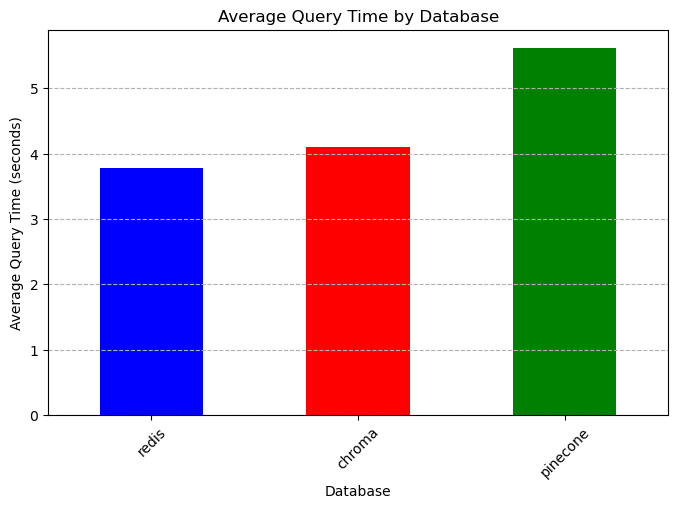

In [15]:
# Compute the average query time for each database
avg_query_times = df.groupby("database")["query_time"].mean().sort_values()

# Plot the results 
plt.figure(figsize=(8, 5))
avg_query_times.plot(kind="bar", color=["blue", "red", "green"])

# Labeling
plt.xlabel("Database")
plt.ylabel("Average Query Time (seconds)")
plt.title("Average Query Time by Database")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()

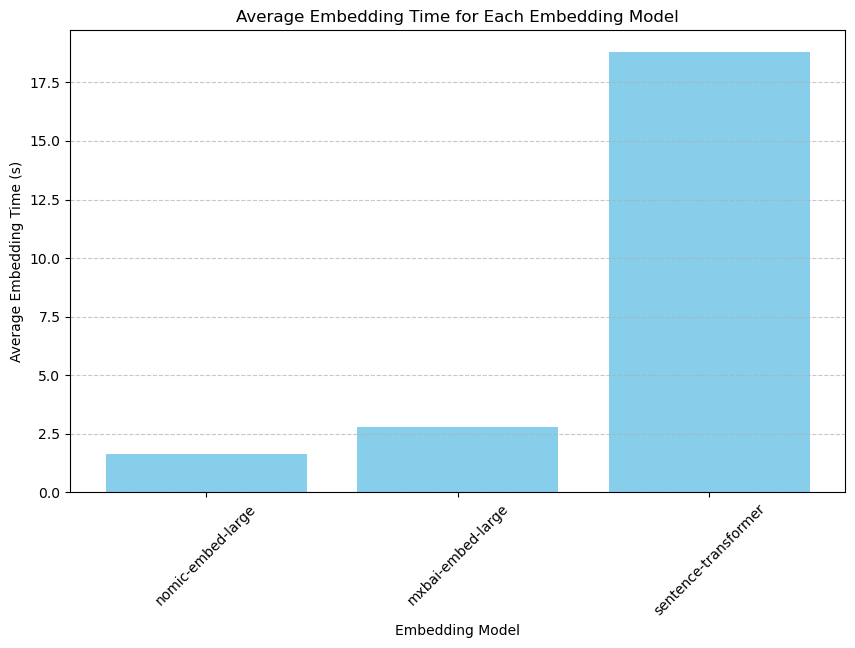

In [14]:
# Compute the average embedding time for each embedding model
avg_embedding_time = df.groupby("embedding_model")['embedding_time'].mean().sort_values()

# Plot the results as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_embedding_time.index, avg_embedding_time.values)
plt.xlabel("Embedding Model")
plt.ylabel("Average Embedding Time (s)")
plt.title("Average Embedding Time for Each Embedding Model")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

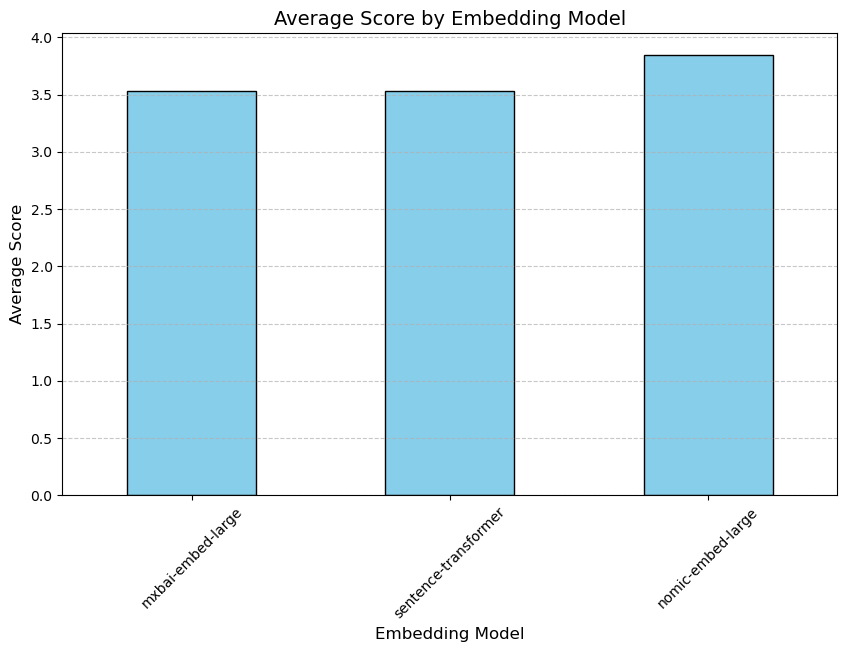

In [17]:
# Convert 'score' to numeric, ignoring errors (in case of empty values)
df["score"] = pd.to_numeric(df["score"], errors="coerce")

# Compute average score for each embedding model
avg_scores = df.groupby("embedding_model")["score"].mean().dropna().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_scores.plot(kind="bar", edgecolor="black")

# Formatting
plt.title("Average Score by Embedding Model", fontsize=14)
plt.xlabel("Embedding Model", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

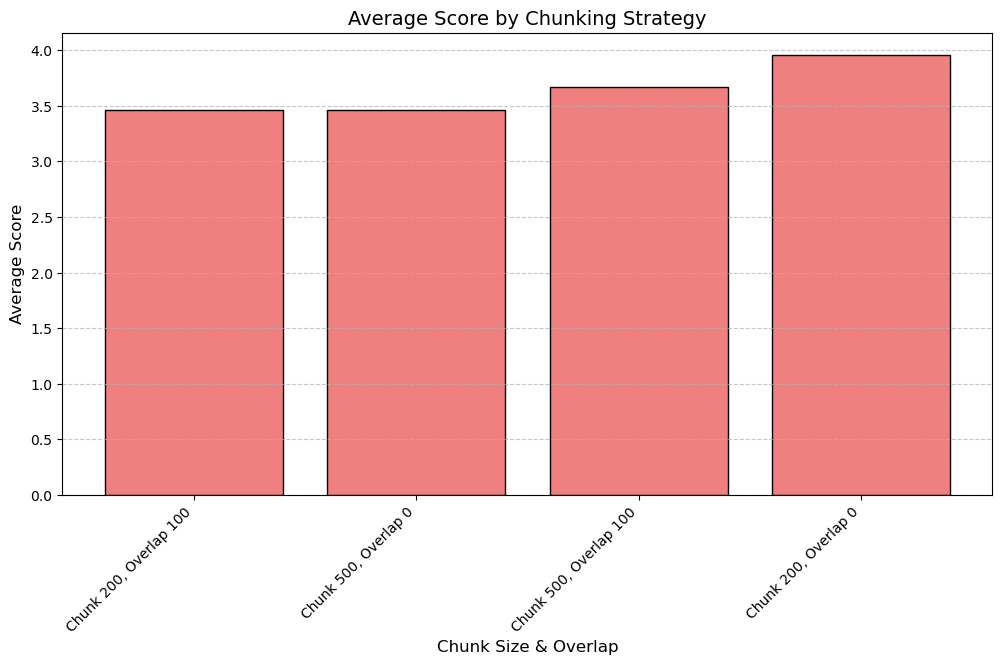

In [20]:


# Convert 'score' to numeric, ignoring errors (in case of empty values)
df["score"] = pd.to_numeric(df["score"], errors="coerce")

# Compute average score for each chunking strategy (chunk_size, overlap)
avg_scores = df.groupby(["chunk_size", "overlap"])["score"].mean().dropna().sort_values()

# Convert index to a more readable format
chunk_labels = [f"Chunk {cs}, Overlap {ov}" for cs, ov in avg_scores.index]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(chunk_labels, avg_scores, color="lightcoral", edgecolor="black")

# Formatting
plt.title("Average Score by Chunking Strategy", fontsize=14)
plt.xlabel("Chunk Size & Overlap", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
